In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
cols = ['year', 'month', 'decimalyear', 'average','interpolated', 'trend', '#days']

In [32]:
df = pd.read_csv("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt", delim_whitespace=True, header=None, comment="#", names=cols)

In [33]:
df.head()

,year,month,decimalyear,average,interpolated,trend,#days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [34]:
df.columns =  ["year", "month", "decimalYear", "co2", "interpolated", "trend", "num_days"]

In [35]:
df.head(2)

,year,month,decimalYear,co2,interpolated,trend,num_days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1


In [36]:
df.iloc[:,[0,1,3]].head(2)

,year,month,co2
0,1958,3,315.71
1,1958,4,317.45


In [37]:
df.head(2)

,year,month,decimalYear,co2,interpolated,trend,num_days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1


In [38]:
# Version using just pandas
#df[df['co2'] == -99.99] = np.NaN

In [39]:
# Version using just np.where
df.co2 = np.where(df["co2"] == -99.99, np.NaN, df["co2"])

In [40]:
df.head()

,year,month,decimalYear,co2,interpolated,trend,num_days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,NaN,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [41]:
df['day'] = 15

In [42]:
df1 = df.iloc[:, [0,1,3,7]]

In [43]:
df1.head()

,year,month,co2,day
0,1958,3,315.71,15
1,1958,4,317.45,15
2,1958,5,317.50,15
3,1958,6,NaN,15
4,1958,7,315.86,15


In [45]:
s = ['year', 'month']

### Dummies__Variables

In [49]:
pd.get_dummies(data=df1, columns=['year', 'month']).head(5)

,co2,day,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,315.71,15,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,317.45,15,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,317.50,15,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,NaN,15,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,315.86,15,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [52]:
def normalize_func(df):
    return ((df-np.mean(df))/np.std(df))
    

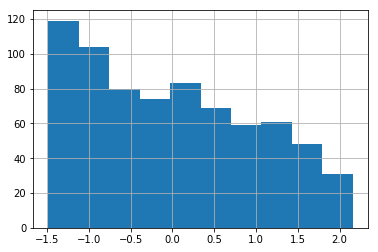

In [54]:
normalize_func(df1['co2']).hist()